<a href="https://colab.research.google.com/github/juniobarret/Area-de-Testes/blob/main/aula03_ENEM_ParteI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#biblioteca para download do dataset
!pip install gdown


In [2]:
#Importação de bibliotecas e configurações de tamanho de gráficos
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [7, 7]

In [3]:
!gdown https://s3.sa-east-1.amazonaws.com/update.service.nxvendas.com.br/microdados_enem_2019.zip
!gdown https://drive.google.com/uc?id=1AEKQmq8LNFz3st6SoiEghRp70YTxtP68

Downloading...
From: https://s3.sa-east-1.amazonaws.com/update.service.nxvendas.com.br/microdados_enem_2019.zip
To: /content/microdados_enem_2019.zip
100% 728M/728M [01:16<00:00, 9.49MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AEKQmq8LNFz3st6SoiEghRp70YTxtP68
To: /content/escolas.csv
100% 82.5M/82.5M [00:01<00:00, 66.5MB/s]


In [4]:
columns = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO','CO_ESCOLA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [5]:
with zipfile.ZipFile('microdados_enem_2019.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
    df = pd.read_csv(f,sep=';',encoding='ISO-8859-1', usecols=columns)

In [6]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


#Qual a quantidade de inscritos por Estado?



In [7]:
df_inscritos_por_estado = df.groupby(['SG_UF_RESIDENCIA'])['SG_UF_RESIDENCIA'].count()
df_inscritos_por_estado.head()


SG_UF_RESIDENCIA
AC     38229
AL     91707
AM    118087
AP     42140
BA    398095
Name: SG_UF_RESIDENCIA, dtype: int64

[]

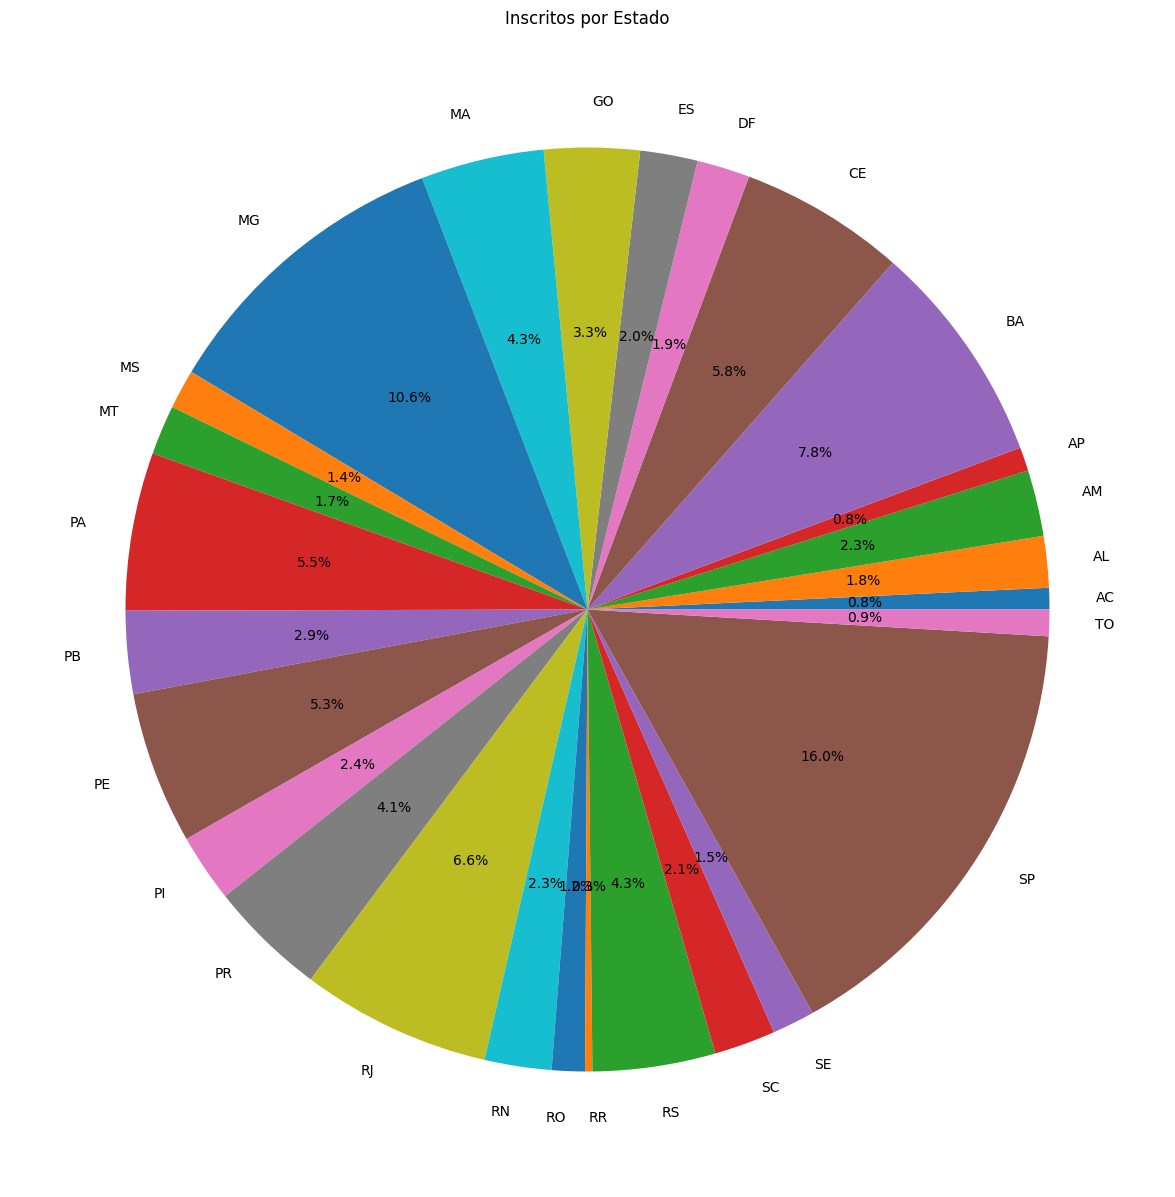

In [8]:
ax= df_inscritos_por_estado.plot.pie(
    title='Inscritos por Estado', #define o título do gráfico
    ylabel='', #esconde o rótulo do eixo y
    legend=False, #exibe ou oculta a legenda
    figsize=(25,15),
    autopct='%1.1f%%')

ax.plot()

#Qual a quantidade de inscritos em Almenara?

In [9]:
df_inscricoes_almenara = df[df['NO_MUNICIPIO_RESIDENCIA']=='Almenara']
df_inscricoes_almenara

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
7857,190001277163,2019,3101706,Almenara,31,MG,23.0,F,1,3,...,A,A,A,B,B,A,C,A,A,B
13125,190001259412,2019,3101706,Almenara,31,MG,36.0,F,1,3,...,A,A,A,B,A,A,B,B,A,B
13308,190001262918,2019,3101706,Almenara,31,MG,28.0,F,1,2,...,B,A,A,D,A,B,D,B,B,B
16748,190001266564,2019,3101706,Almenara,31,MG,18.0,F,1,3,...,B,A,A,B,A,A,D,A,B,B
24719,190001273766,2019,3101706,Almenara,31,MG,17.0,F,1,1,...,B,A,A,B,A,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065998,190005506405,2019,3101706,Almenara,31,MG,19.0,F,1,3,...,B,A,A,B,A,A,C,A,B,A
5075988,190005499229,2019,3101706,Almenara,31,MG,43.0,F,1,1,...,B,A,A,B,B,A,B,A,B,B
5077252,190005499282,2019,3101706,Almenara,31,MG,19.0,M,1,2,...,A,A,A,A,A,A,E,A,B,B
5077513,190005511080,2019,3101706,Almenara,31,MG,19.0,M,1,2,...,A,A,A,A,A,A,E,A,B,B


In [10]:
df_inscricoes_almenara.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,9.180000e+02,918.0,918.0,918.0,918.000000,918.000000,918.000000,918.000000,8.780000e+02,878.000000,...,730.000000,693.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,918.000000
mean,1.900034e+11,2019.0,3101706.0,31.0,21.977124,1.093682,2.412854,1.045752,3.127473e+06,31.197039,...,515.575616,513.489033,1.190411,118.739726,117.863014,110.712329,118.164384,89.506849,554.986301,3.818083
std,1.497548e+06,0.0,0.0,0.0,7.267630,0.438028,0.909497,0.260187,1.600308e+05,1.558042,...,60.608920,101.900483,0.990028,34.387459,43.088359,40.717663,38.353283,58.897303,189.460464,1.390347
min,1.900012e+11,2019.0,3101706.0,31.0,15.000000,0.000000,0.000000,0.000000,2.211001e+06,22.000000,...,335.900000,359.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.900022e+11,2019.0,3101706.0,31.0,18.000000,1.000000,2.000000,1.000000,3.101706e+06,31.000000,...,482.925000,433.700000,1.000000,100.000000,120.000000,100.000000,100.000000,40.000000,480.000000,3.000000
50%,1.900035e+11,2019.0,3101706.0,31.0,19.000000,1.000000,3.000000,1.000000,3.101706e+06,31.000000,...,519.200000,487.500000,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,560.000000,4.000000
75%,1.900046e+11,2019.0,3101706.0,31.0,23.000000,1.000000,3.000000,1.000000,3.101706e+06,31.000000,...,557.275000,581.300000,1.000000,140.000000,120.000000,140.000000,140.000000,140.000000,640.000000,4.000000
max,1.900061e+11,2019.0,3101706.0,31.0,60.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,717.600000,860.800000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000,12.000000


#Qual a ideda média dos inscritos de almenara? Qual mais novo? Qual mais velho?

In [11]:
df_inscricoes_almenara[['NU_IDADE']].describe()

,NU_IDADE
count,918.000000
mean,21.977124
std,7.267630
min,15.000000
25%,18.000000
50%,19.000000
75%,23.000000
max,60.000000


[]

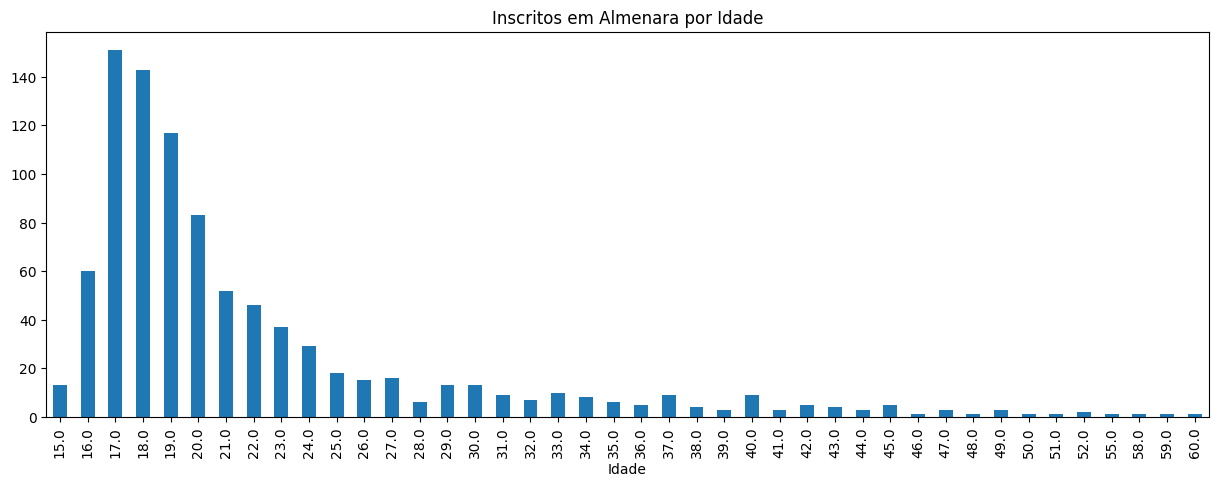

In [12]:
df_inscricoes_almenara_idade = df_inscricoes_almenara.groupby(['NU_IDADE'])['NU_IDADE'].count()
ax = df_inscricoes_almenara_idade.plot.bar(
    title='Inscritos em Almenara por Idade',
    xlabel='Idade',
    figsize=(15,5))

ax.plot()

In [13]:
print(f'Média: {df_inscricoes_almenara["NU_IDADE"].mean()}')
print(f'Moda: {df_inscricoes_almenara["NU_IDADE"].mode()}')
print(f'Mediana: {df_inscricoes_almenara["NU_IDADE"].median()}')

Média: 21.977124183006534
Moda: 0    17.0
Name: NU_IDADE, dtype: float64
Mediana: 19.0


#Qual o estado civil dos inscritos?

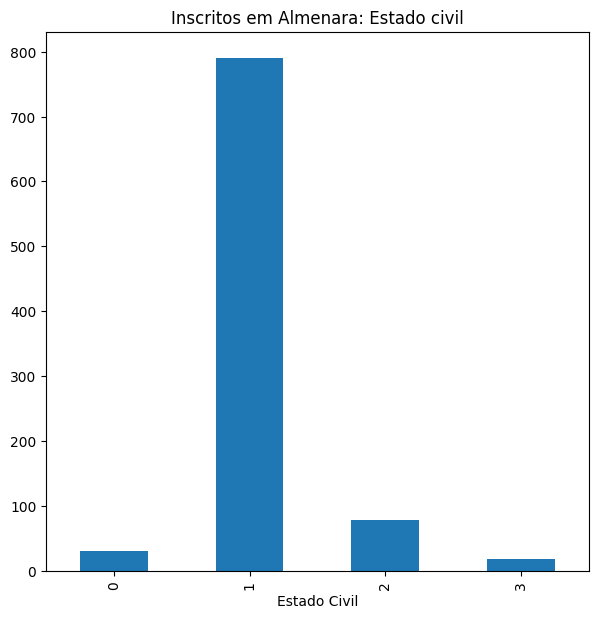

In [14]:
estado_civil = {
    0:'Não informado',
    1:'Solteiro(a)',
    2:'Casado(a)/Mora com companheiro(a)',
    3:'Divorciado(a)/Desquitado(a)/Separado(a)',
    4:'Viúvo(a)'
}
estado_civil.values()

ax = df_inscricoes_almenara.groupby(['TP_ESTADO_CIVIL'])['TP_ESTADO_CIVIL'].count().plot.bar(
    title='Inscritos em Almenara: Estado civil',
    xlabel='Estado Civil')

#ax.set_xticklabels(estado_civil.values())
plt.show()


#Quanto aos alunos do IFNMG-Almenara, quantos são os inscritos?

In [15]:
df_insccricoes_IFNMG = df_inscricoes_almenara[ df_inscricoes_almenara['CO_ESCOLA']==31349658]
df_insccricoes_IFNMG.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5.600000e+01,56.0,56.0,56.0,56.000000,56.000000,56.000000,56.0,5.600000e+01,56.000000,...,55.000000,54.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,56.000000
mean,1.900029e+11,2019.0,3101706.0,31.0,17.678571,1.035714,2.125000,1.0,3.104928e+06,31.000000,...,566.987273,629.590741,1.236364,138.181818,144.000000,137.454545,151.272727,149.454545,720.363636,3.875000
std,1.330979e+06,0.0,0.0,0.0,0.811444,0.267261,0.935414,0.0,7.016700e+04,0.660578,...,43.905104,95.605394,1.261446,34.052841,41.526431,34.222485,42.472411,49.118835,177.700994,1.079773
min,1.900013e+11,2019.0,3101706.0,31.0,17.000000,1.000000,0.000000,1.0,2.910727e+06,29.000000,...,471.100000,422.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.900017e+11,2019.0,3101706.0,31.0,17.000000,1.000000,1.000000,1.0,3.101706e+06,31.000000,...,546.700000,556.300000,1.000000,120.000000,120.000000,120.000000,120.000000,140.000000,670.000000,3.000000
50%,1.900027e+11,2019.0,3101706.0,31.0,17.000000,1.000000,2.000000,1.0,3.101706e+06,31.000000,...,574.800000,657.600000,1.000000,140.000000,140.000000,140.000000,160.000000,160.000000,760.000000,4.000000
75%,1.900036e+11,2019.0,3101706.0,31.0,18.000000,1.000000,3.000000,1.0,3.101706e+06,31.000000,...,595.200000,689.950000,1.000000,160.000000,180.000000,160.000000,180.000000,180.000000,820.000000,4.250000
max,1.900058e+11,2019.0,3101706.0,31.0,20.000000,3.000000,3.000000,1.0,3.550308e+06,35.000000,...,648.900000,784.900000,9.000000,180.000000,200.000000,200.000000,200.000000,200.000000,960.000000,7.000000


#É possível traçar um perfil desses estudantes?

In [16]:
df_sexo_IFNMG = df_insccricoes_IFNMG.groupby(['TP_SEXO'])['TP_SEXO'].count()

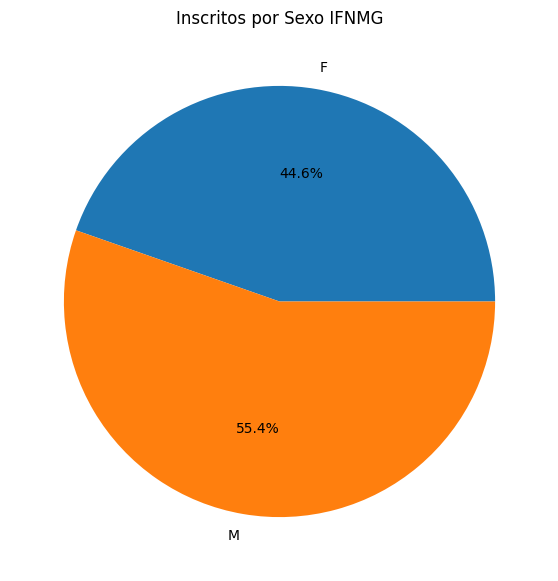

In [17]:
ax= df_sexo_IFNMG.plot.pie(
    title='Inscritos por Sexo IFNMG', #define o título do gráfico
    ylabel='', #esconde o rótulo do eixo y
    legend=False, #exibe ou oculta a legenda
    autopct='%1.1f%%')

plt.show()

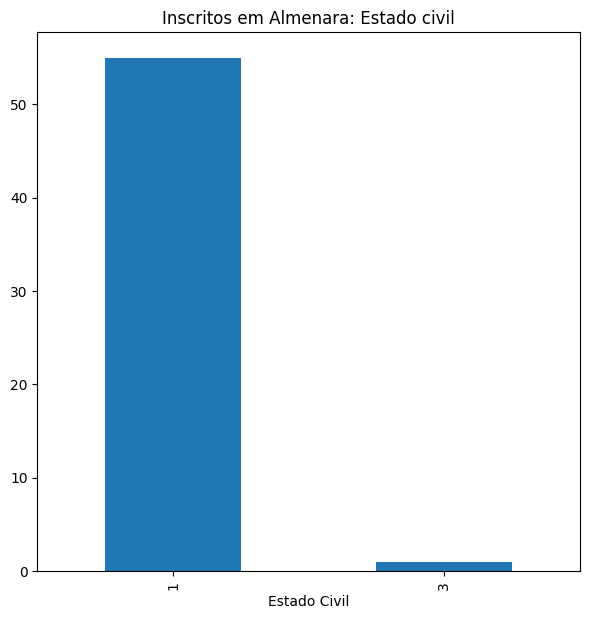

In [18]:
df_estado_civil_IFNMG = df_insccricoes_IFNMG.groupby(['TP_ESTADO_CIVIL'])['TP_ESTADO_CIVIL'].count()
ax = df_estado_civil_IFNMG.plot.bar(
    title='Inscritos em Almenara: Estado civil',
    xlabel='Estado Civil')

#ax.set_xticklabels(estado_civil.values())

plt.show()

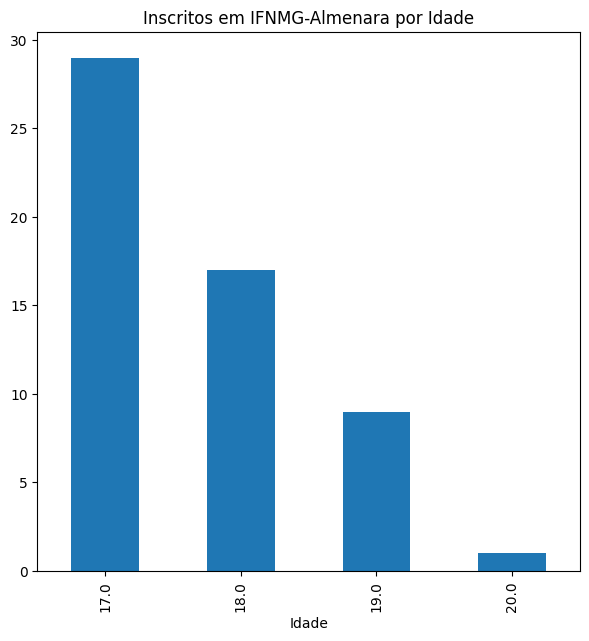

In [19]:
df_idade_IFNMG = df_insccricoes_IFNMG.groupby(['NU_IDADE'])['NU_IDADE'].count()
ax = df_idade_IFNMG.plot.bar(
    title='Inscritos em IFNMG-Almenara por Idade',
    xlabel='Idade')

plt.show()

In [21]:
df_idade_IFNMG

NU_IDADE
17.0    29
18.0    17
19.0     9
20.0     1
Name: NU_IDADE, dtype: int64

In [22]:
df_insccricoes_IFNMG[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
63168,511.6,572.6,568.0,724.7,800.0
83941,526.4,618.7,612.3,710.0,900.0
183302,596.4,601.6,610.9,687.1,680.0
290533,489.5,563.2,616.1,483.9,840.0
364073,573.0,660.3,581.4,683.6,860.0
368885,573.4,605.3,611.0,737.6,860.0
387342,NaN,417.8,484.2,NaN,720.0
393255,457.5,502.5,532.9,622.9,800.0
511851,511.8,515.4,529.1,509.5,720.0
608815,504.6,552.7,560.8,552.0,760.0


<Axes: title={'center': 'Nota da prova de Ciências da Natureza'}, ylabel='Frequency'>

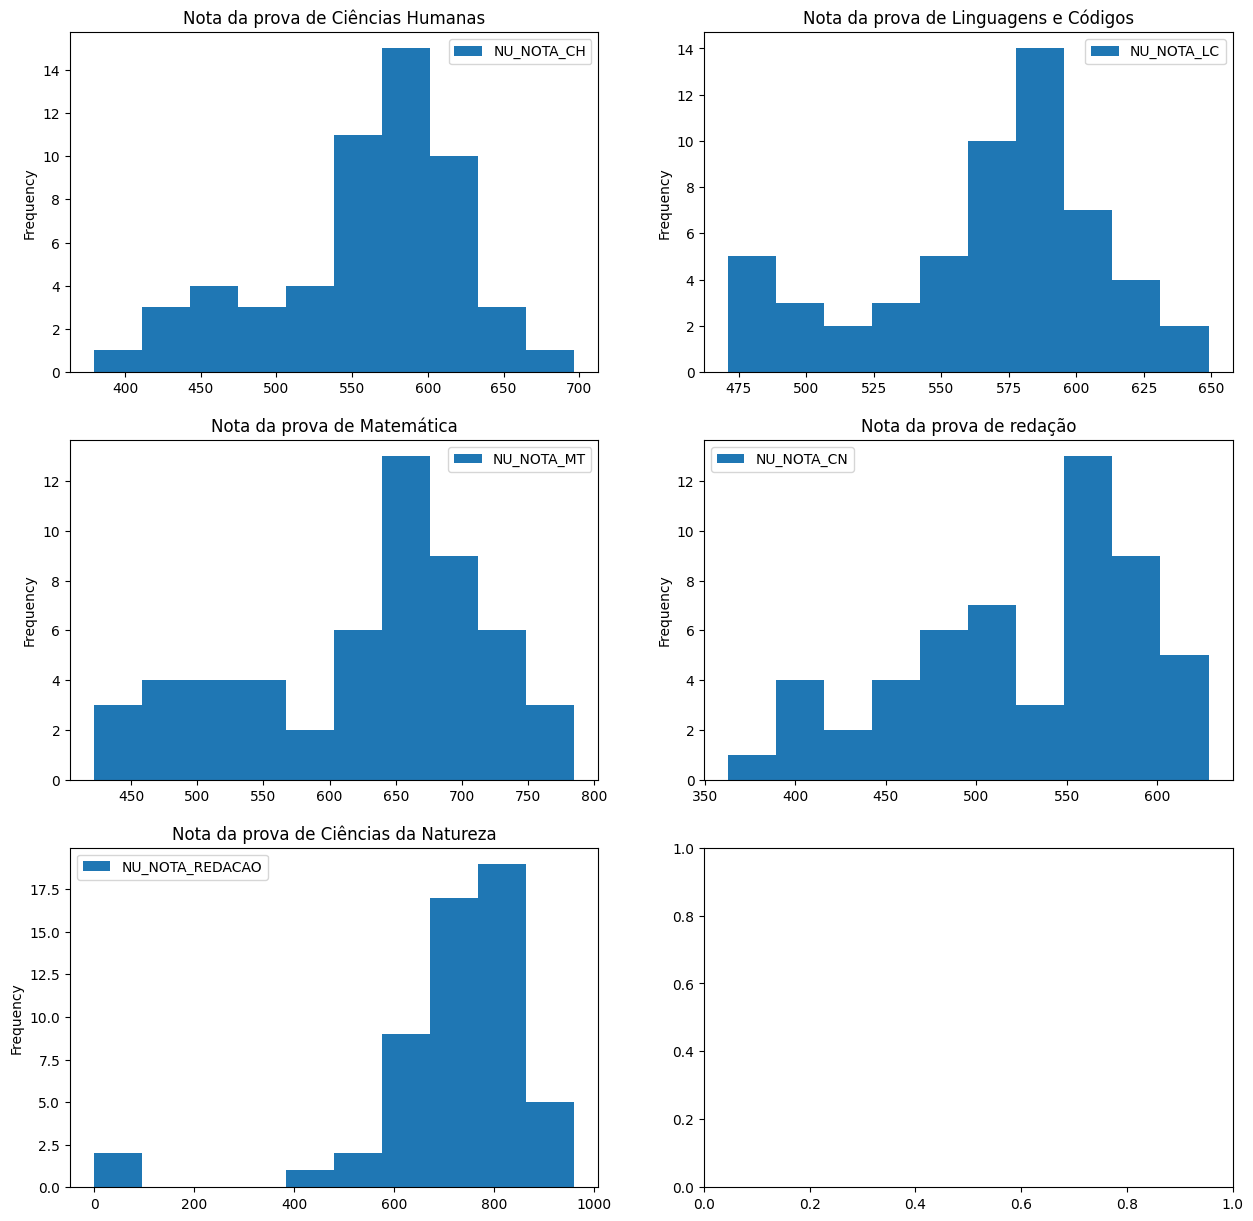

In [23]:
fig1, axs = plt.subplots(ncols=2, nrows=3, figsize=(15,15))

df_insccricoes_IFNMG[['NU_NOTA_CH']].plot.hist(ax=axs[0,0],title='Nota da prova de Ciências Humanas')
df_insccricoes_IFNMG[['NU_NOTA_LC']].plot.hist(ax=axs[0,1],title='Nota da prova de Linguagens e Códigos')
df_insccricoes_IFNMG[['NU_NOTA_MT']].plot.hist(ax=axs[1,0],title='Nota da prova de Matemática')
df_insccricoes_IFNMG[['NU_NOTA_CN']].plot.hist(ax=axs[1,1],title='Nota da prova de redação')
df_insccricoes_IFNMG[['NU_NOTA_REDACAO']].plot.hist(ax=axs[2,0],title='Nota da prova de Ciências da Natureza')

<Axes: >

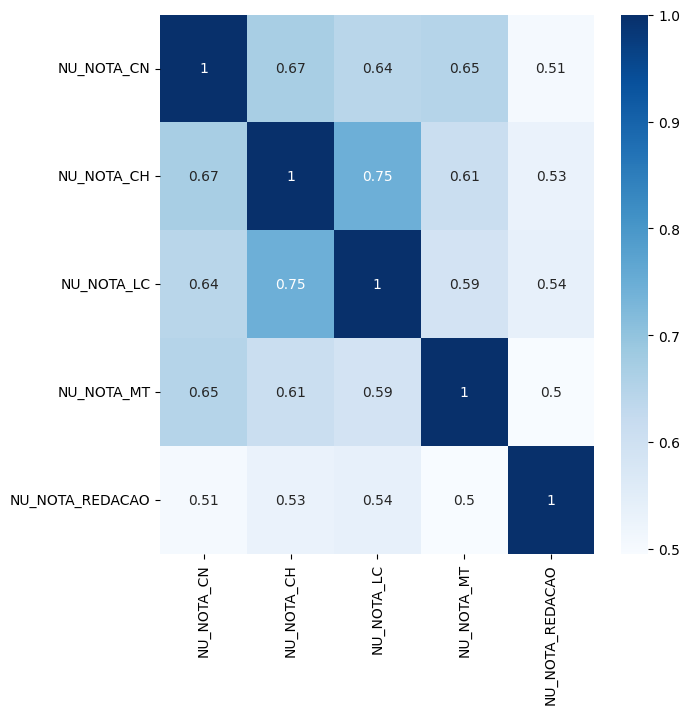

In [24]:
import seaborn as sb
correla = df[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].corr()
sb.heatmap(correla, cmap="Blues", annot=True)

In [25]:
df_inscricoes_almenara.groupby(['CO_ESCOLA'])['NU_NOTA_REDACAO'].mean()

CO_ESCOLA
31184519.0    497.600000
31184543.0    604.533333
31184551.0    485.000000
31184578.0    626.666667
31184608.0    280.000000
31184799.0    520.000000
31246336.0    578.064516
31313793.0    480.000000
31349658.0    720.363636
35004862.0           NaN
35036936.0    620.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [26]:
df_escolas = pd.read_csv('escolas.csv', sep=';')
df_escolas.head()

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Categoria Administrativa,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude
0,ESCOLA ATENDE EXCLUSIVAMENTE ALUNOS COM DEFICI...,EEEE ABNAEL MACHADO DE LIMA - CENE,11000023,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Pública,"AVENIDA AMAZONAS, 6492 ZONA LESTE. TIRADENTES....",(69) 992083054,Estadual,Não Informado,Não,Não,Entre 51 e 200 matrículas de escolarização,Ensino Fundamental,Atendimento Educacional Especializado,-8.758459,-63.854011
1,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,EMEIEF PEQUENOS TALENTOS,11000040,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Pública,"RUA CAETANO, 3256 PREDIO. CALADINHO. 76808-108...",(69) 32274273,Municipal,Não Informado,Não,Sim,Entre 201 e 500 matrículas de escolarização,Educação Infantil,NaN,-8.793730,-63.883919
2,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO DE ENSINO CLASSE A,11000058,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Privada,"AVENIDA CARLOS GOMES, 1135 CENTRO. 76801-123 P...",(69) 32244473,Privada,Particular,Não,Sim,Mais de 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental, Ensino ...",NaN,-8.760734,-63.901986
3,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO EDUCACIONAL PRESBITERIANO 15 DE NOVEMBRO,11000082,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Privada,"RUA ALMIRANTE BARROSO, 1483 SANTA BARBARA. 768...",(69) 32245636,Privada,Particular,Não,Sim,Entre 51 e 200 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-8.765205,-63.896177
4,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO EDUC CORA CORALINA,11000104,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Privada,"RUA MEXICO, 1056 NOVA PORTO VELHO. 76820-190 P...",(69) 32252616,Privada,Particular,Não,Sim,Entre 501 e 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-8.768633,-63.875471


In [27]:
df_medias_escolas_almenara = pd.DataFrame(df_inscricoes_almenara.groupby(['CO_ESCOLA'])['NU_NOTA_REDACAO'].mean()).reset_index()
df_medias_escolas_almenara

,CO_ESCOLA,NU_NOTA_REDACAO
0,31184519.0,497.600000
1,31184543.0,604.533333
2,31184551.0,485.000000
3,31184578.0,626.666667
4,31184608.0,280.000000
5,31184799.0,520.000000
6,31246336.0,578.064516
7,31313793.0,480.000000
8,31349658.0,720.363636
9,35004862.0,NaN


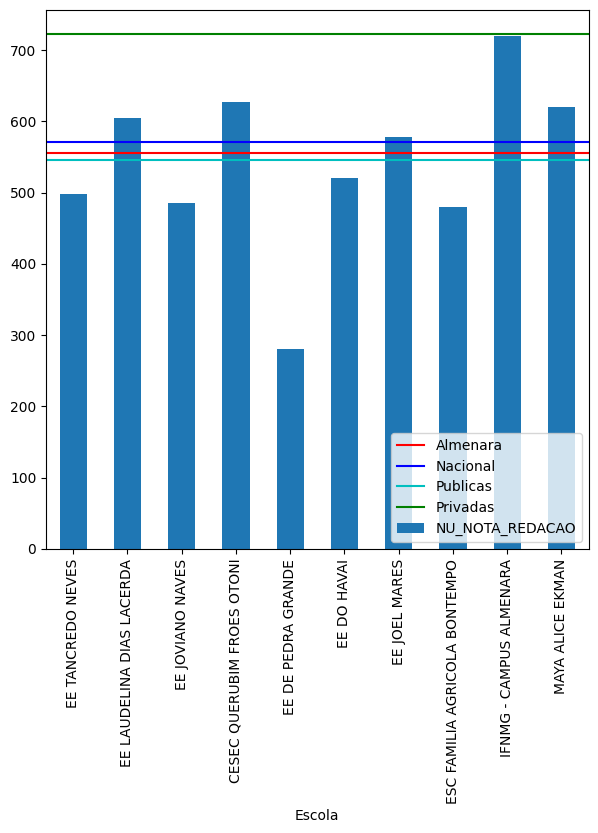

In [28]:
import numpy as np

df_medias_escolas_almenara['CO_ESCOLA'] = df_medias_escolas_almenara['CO_ESCOLA'].astype(np.int64)
df_medias_escolas_almenara['Escola'] = df_medias_escolas_almenara['CO_ESCOLA'].map(df_escolas.set_index('Código INEP')['Escola'])
df_medias_escolas_almenara = df_medias_escolas_almenara.dropna()

ax = df_medias_escolas_almenara.plot.bar(x='Escola',y='NU_NOTA_REDACAO')

ax.axhline(df_inscricoes_almenara['NU_NOTA_REDACAO'].mean(), color='r', label='Almenara')
ax.axhline(df['NU_NOTA_REDACAO'].mean(), color='b', label='Nacional')
ax.axhline(df[df['TP_ESCOLA']==2]['NU_NOTA_REDACAO'].mean(), color='c', label='Publicas')
ax.axhline(df[df['TP_ESCOLA']==3]['NU_NOTA_REDACAO'].mean(), color='g', label='Privadas')
ax.legend(loc='lower right');

In [29]:
df_escolas_ifngm = df_escolas[df_escolas['Escola'].str.contains('IFNMG')][['Escola','Código INEP']]
df_escolas_ifngm.index = df_escolas_ifngm['Código INEP']
df_escolas_ifngm = df_escolas_ifngm['Escola']
df_escolas_ifngm

Código INEP
31026389                      IFNMG - CAMPUS AVANCADO JANAUBA
31026540                         IFNMG - CAMPUS TEOFILO OTONI
31026699                            IFNMG - CAMPUS DIAMANTINA
31031471                  IFNMG - CAMPUS AVANCADO PORTEIRINHA
31031552    IFNMG - CENTRO DE REFERENCIA EM EDUCACAO A DIS...
31032869                 IFNMG - CENTRO DE REFERENCIA CORINTO
31062260                              IFNMG - CAMPUS JANUARIA
31233269                               IFNMG - CAMPUS SALINAS
31345440                                IFNMG - CAMPUS ARINOS
31347272                               IFNMG - CAMPUS ARACUAI
31349410                              IFNMG - CAMPUS PIRAPORA
31349607                         IFNMG - CAMPUS MONTES CLAROS
31349658                              IFNMG - CAMPUS ALMENARA
Name: Escola, dtype: object

In [30]:
import numpy as np
df['CO_ESCOLA'] = df['CO_ESCOLA'].astype(np.int64,errors='ignore')
df_inscricoes_escolas_ifnmg = df[df['CO_ESCOLA'].isin(df_escolas_ifngm.index)]
df_inscricoes_escolas_ifnmg = df_inscricoes_escolas_ifnmg.dropna()
df_inscricoes_escolas_ifnmg.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1615,190001255713,2019,3135100,Janaúba,31,MG,17.0,F,1,2,...,B,A,A,B,A,B,D,A,B,B
9482,190001273560,2019,3135209,Januária,31,MG,17.0,M,1,3,...,A,A,A,B,A,A,C,A,B,A
13242,190001262909,2019,3135100,Janaúba,31,MG,17.0,F,1,1,...,A,A,A,B,A,A,D,A,B,B
16669,190001266560,2019,3135209,Januária,31,MG,18.0,F,1,3,...,A,A,A,B,A,A,C,B,A,A
21960,190001266628,2019,3157005,Salinas,31,MG,18.0,M,1,1,...,B,A,A,C,B,A,C,A,A,A


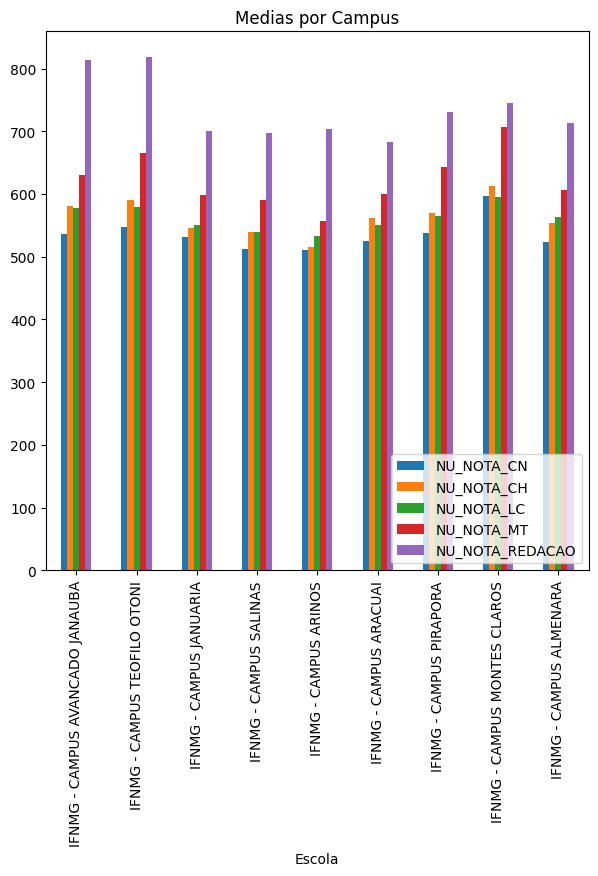

In [31]:
medias_escolas_ifnmg = pd.DataFrame(df_inscricoes_escolas_ifnmg.groupby(['CO_ESCOLA'])[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean()).reset_index()
medias_escolas_ifnmg['Escola'] = medias_escolas_ifnmg['CO_ESCOLA'].map(df_escolas.set_index('Código INEP')['Escola'])
medias_escolas_ifnmg
ax = medias_escolas_ifnmg.plot.bar(x='Escola', y=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'], title='Medias por Campus')

ax.legend(loc='lower right');